
<p align="center">
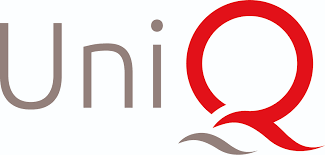 &nbsp;&nbsp;&nbsp;&nbsp;
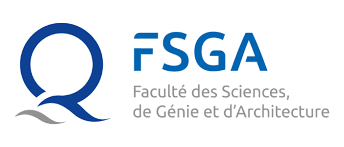
</p>

# S2 — Ensembles, relations & fonctions  
*Mathématiques pour l’informatique (Bac+2)* — Notebook d’accompagnement  
**Version :** 11/09/2025

**Objectifs de la séance**
- Manipuler \(\subset, \cup, \cap, \setminus\), complémentaire (par rapport à un univers \(U\)), et le produit cartésien \(E\times F\).
- Travailler avec des **applications** (fonctions) : image directe \(f(A)\), image réciproque \(f^{-1}(B)\), **composition**, **restriction**.
- Caractériser **injection / surjection / bijection**, construire l’**inverse** quand la bijectivité est vraie.
- Dénombrer : \(|\mathcal P(E)|=2^n\), **fonctions** \(F^E\) (\(p^n\)), **injections** (permutations partielles), **bijections** (\(n!\)).
- Relations : **réflexive / symétrique / transitive**, **équivalences** et **classes** (ex. congruence modulo \(n\)).



## 1) Prérequis & imports
On utilise uniquement la bibliothèque standard Python.


In [ ]:
from itertools import product, combinations, permutations, chain
import math

def powerset(iterable):
    "Renvoie l'ensemble des sous-ensembles (itérateur)"
    s = list(iterable)
    for r in range(len(s)+1):
        for comb in combinations(s, r):
            yield set(comb)

def binom(n, k):
    return math.comb(n, k)

def falling_factorial(p, n):
    # p * (p-1) * ... * (p-n+1)
    res = 1
    for i in range(n):
        res *= (p - i)
    return res



## 2) Ensembles — création et opérations
**Remarque :** le **complémentaire** est défini **par rapport à un univers choisi** \(U\). En Python, on l'émule via `U - A`.


In [ ]:
# Définition de quelques ensembles finis
U = set(range(1, 11))   # univers de travail: {1,...,10}
A = {1,2,3,5,8}
B = {2,4,6,8,10}

print("U =", U)
print("A =", A)
print("B =", B)

# Opérations
print("A ∪ B =", A | B)
print("A ∩ B =", A & B)
print("A \ B =", A - B)
print("Complément de A dans U =", U - A)

# Vérifier quelques lois (assertions)
assert (A | B) == (B | A)        # commutativité union
assert (A & (B | (U-A))) == ((A & B) | (A & (U-A)))  # distributivité
print("Lois testées avec succès.")



## 3) Produit cartésien \(E\times F\)


In [ ]:
E = {1,2,3}
F = {"a","b"}
ExF = {(x,y) for x in E for y in F}
print("E×F =", ExF)
print("|E×F| =", len(ExF), " = |E|*|F| =", len(E)*len(F))



## 4) Fonctions (finies) et représentations
Pour des ensembles finis, on peut représenter une **application** \(f:E\to F\) par un **dictionnaire** `f` avec clés dans `E`.


In [ ]:
E = {1,2,3,4}
F = {"x","y","z"}
f = {1:"x", 2:"y", 3:"y", 4:"z"}  # f: E→F

def image_directe(f_map, A):
    return {f_map[x] for x in A if x in f_map}

def image_reciproque(f_map, B):
    return {x for x,v in f_map.items() if v in B}

A = {2,3}
B = {"y"}
print("f =", f)
print("f(A) =", image_directe(f, A))
print("f^{-1}(B) =", image_reciproque(f, B))



## 5) Injectivité / Surjectivité / Bijectivité


In [ ]:
def is_function(f_map, E, F):
    # Chaque x∈E a exactement une image dans F
    return set(f_map.keys()) == set(E) and all(v in F for v in f_map.values())

def is_injective(f_map):
    vals = list(f_map.values())
    return len(set(vals)) == len(vals)

def is_surjective(f_map, F):
    return set(f_map.values()) == set(F)

def is_bijective(f_map, E, F):
    return is_function(f_map, E, F) and is_injective(f_map) and is_surjective(f_map, F)

def inverse_bijection(f_map):
    # suppose f_map bijective
    return {v:k for k,v in f_map.items()}

E = {1,2,3}
F = {"a","b","c"}
g = {1:"a", 2:"b", 3:"c"}
h = {1:"a", 2:"a", 3:"b"}

print("g est fonction:", is_function(g, E, F))
print("g injective ?", is_injective(g), " | surjective ?", is_surjective(g, F), " | bijective ?", is_bijective(g, E, F))
print("h injective ?", is_injective(h), " | surjective ?", is_surjective(h, F))

if is_bijective(g, E, F):
    g_inv = inverse_bijection(g)
    print("g^{-1} =", g_inv)



## 6) Composition & restriction


In [ ]:
def compose(f_map, g_map):
    # (g ∘ f)(x) = g(f(x))
    return {x: g_map[f_map[x]] for x in f_map if f_map[x] in g_map}

E = {1,2,3}
F = {"a","b","c"}
G = {10,20,30}
f = {1:"a", 2:"b", 3:"c"}
g = {"a":10, "b":20, "c":30}

gof = compose(f, g)
print("(g∘f) =", gof)

# Restriction de f à A
A = {1,3}
f_restr = {x:f[x] for x in A}
print("f|_A =", f_restr)



## 7) Dénombrements classiques
Soient \(|E|=n\) et \(|F|=p\).
- **Fonctions** \(E\to F\) : \(p^n\).  
- **Injections** \(E\hookrightarrow F\) (si \(p\ge n\)) : \(p\cdot (p-1)\cdots (p-n+1)\).  
- **Bijections** \(E\to E\) : \(n!\).


In [ ]:
def count_functions(n, p): return p**n
def count_injections(n, p): 
    if p < n: return 0
    return falling_factorial(p, n)
def count_bijections(n): return math.factorial(n)

print("n=3, p=5 → fonctions:", count_functions(3,5))
print("injections:", count_injections(3,5))
print("bijections sur n=3:", count_bijections(3))

# Vérification brute pour un petit cas (n=2, p=3)
E = [1,2]; F = ["a","b","c"]
from itertools import product
all_funcs = [{E[0]:u, E[1]:v} for (u,v) in product(F, repeat=2)]
inj = [f for f in all_funcs if len({f[E[0]], f[E[1]]})==2]
print("Bruteforce n=2,p=3 → |F^E|=",len(all_funcs)," ; |inj|=",len(inj))



## 8) Parties & coefficients binomiaux


In [ ]:
S = {1,2,3,4}
P = list(powerset(S))
print("P(S) contient", len(P), "sous-ensembles ; attendu 2^n =", 2**len(S))
print("Exemples:", P[:8], "...")

# Identité Σ C(n,k) = 2^n
for n in range(1,7):
    lhs = sum(binom(n,k) for k in range(n+1))
    rhs = 2**n
    print(f"n={n}: somme des C(n,k)={lhs}  |  2^n={rhs}")



## 9) Binôme de Newton — coefficients
\[(a+b)^n = \sum_{k=0}^n \binom{n}{k} a^{n-k} b^k.\]


In [ ]:
def binomial_expansion_coeffs(n):
    # renvoie la liste des coefficients de (a+b)^n (ordre a^{n-k} b^k)
    return [binom(n,k) for k in range(n+1)]

for n in range(0,6):
    print(n, ":", binomial_expansion_coeffs(n))



## 10) Relations — réflexive, symétrique, transitive
On modélise une **relation** \(R\subseteq E\times E\) par un ensemble de couples.


In [ ]:
def is_reflexive(R, E):
    return all((x,x) in R for x in E)

def is_symmetrical(R):
    return all(((y,x) in R) for (x,y) in R)

def is_transitive(R):
    # Pour tous x,y,z: (xRy et yRz) ⇒ xRz
    Rset = set(R)
    for (x,y) in Rset:
        for (u,z) in Rset:
            if u == y and ((x,z) not in Rset):
                return False
    return True

def equivalence_classes(R, E):
    # suppose équivalence
    classes = []
    seen = set()
    for x in E:
        if x in seen: 
            continue
        cl = {y for y in E if (x,y) in R}
        classes.append(cl)
        seen |= cl
    return classes

E = {0,1,2,3}
# Relation "même parité"
R = {(x,y) for x in E for y in E if (x-y)%2==0}

print("Réflexive ?", is_reflexive(R, E))
print("Symétrique ?", is_symmetrical(R))
print("Transitive ?", is_transitive(R))
print("Classes :", equivalence_classes(R, E))



## 11) Congruence modulo \(n\) et \(\mathbb{Z}/n\mathbb{Z}\)
Définition : \(a \equiv b \pmod n\) ssi \(n\mid (a-b)\).


In [ ]:
def classes_mod(n, reps=None):
    reps = reps or list(range(n))
    return {r: {x for x in range(-3*n,3*n+1) if (x-r)%n==0} for r in reps}

def add_mod(a,b,n): return (a+b) % n
def mul_mod(a,b,n): return (a*b) % n

n = 7
cl = classes_mod(n, reps=list(range(n)))
print("Extraits de classes modulo", n, ":")
for r in range(n):
    sample = [x for i,x in enumerate(sorted(cl[r])) if i<5]
    print(r, "→", sample, "...")

# Vérif 'compatibilité' addition/multiplication
a,b = 10, 20
ra, rb = a % n, b % n
print("((a mod n)+(b mod n)) mod n =", add_mod(ra,rb,n), " | (a+b) mod n =", (a+b)%n)
print("((a mod n)*(b mod n)) mod n =", mul_mod(ra,rb,n), " | (a*b) mod n =", (a*b)%n)



## 12) Mini‑exercices (guidés)


In [ ]:
# (1) Vérifier De Morgan via ensembles finis
U = set(range(1,11))
A, B = {1,3,5,7,9}, {2,3,5,7}
lhs = U - (A | B)
rhs = (U - A) & (U - B)
assert lhs == rhs

# (2) Calculer f(A) et f^{-1}(B) pour f: E→F donnée
E = {1,2,3,4}; F = {"x","y","z"}; f = {1:"x", 2:"y", 3:"y", 4:"z"}
A = {1,2,3}; B = {"y"}
assert {f[a] for a in A} == {"x","y"}
assert {x for x,v in f.items() if v in B} == {2,3}

# (3) Tester injectivité/surjectivité
E = {1,2,3}; F = {"a","b","c"}; g = {1:"a",2:"b",3:"c"}
assert all([len(g)==len(E), len(set(g.values()))==len(g), set(g.values())==F])

print("OK — exercices guidés validés.")



## 13) Ticket de sortie (auto‑évaluation rapide)
1. Distinguer rapidement **image** `f(A)` et **image réciproque** `f⁻¹(B)` ?  
2. Saisir les critères **injective / surjective / bijective** ?  
3. Savoir compter \(|\mathcal P(E)|\), le nombre de **fonctions** \(E\to F\), d’**injections**, de **bijections** ?  
4. Expliquer en une phrase ce qu’est une **classe d’équivalence** (ex. modulo \(n\)).
